##### import the libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

##### configure the plot style

In [2]:
plt.style.use('seaborn')
plt.rc('font', size=12) # controls default text sizes
plt.rc('axes', titlesize=18) # fontsize of the axes title
plt.rc('axes', labelsize=16) # fontsize of the x and y labels
plt.rc('xtick', labelsize=14) # fontsize of the x tick labels
plt.rc('ytick', labelsize=14) # fontsize of the y tick labels
plt.rc('legend', fontsize=14) # legend fontsize
plt.rc('figure', titlesize=18) # fontsize of the figure title
plt.rc('figure', figsize=(10,8)) # size of the figure

# Practice Peer-graded Assignment: Visualization and Imputation

### Instructions

Now that you've learned about summarizing information with data visualization and handling missing data with imputation, it's time to apply these skills to a real-world case. 

With the summary and dataset from the previous section (Getting Started with the Case Study), your first challenge is to:
- Investigate the extent and nature of the missing data
- Design and implement an imputation technique for the missing data
- Produce a visualization for AAVAIL stakeholders on the US and Singapore markets using your modified dataset

### Task 1 - Investigate the extent and nature of the missing data
Investigate the new dataset and upload a visualization or multiple visualizations that summarize the nature and extent of the missing data. Be sure to include text to make your visualization clearer. Hint: You can add multiple plots to one figure in Python with matplotlib using the .subplots method.

#### Grading criteria
- Did the learner upload at least one visualization related to the nature and extent of the missing data in the new AAVAIL dataset?
- Did the learner add labels, titles, and/or other elements to help make their visualization(s) clearer?

### Solution:

#### Reading and researching the data

In [3]:
data = pd.read_csv('../data/aavail-data-visualization.csv')
data.head()

,customer_id,country_name,age,customer_name,is_subscriber,subscriber_type,num_streams
0,1,united_states,21.0,Kasen Todd,True,aavail_premium,23.0
1,2,singapore,31.0,Ensley Garza,False,NaN,12.0
2,3,united_states,22.0,Lillian Carey,False,aavail_premium,22.0
3,4,united_states,21.0,Beau Christensen,True,aavail_basic,19.0
4,5,singapore,22.0,Ernesto Gibson,True,aavail_premium,23.0


In [4]:
data.info() # summary information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      1000 non-null   int64  
 1   country_name     1000 non-null   object 
 2   age              1000 non-null   float64
 3   customer_name    1000 non-null   object 
 4   is_subscriber    1000 non-null   bool   
 5   subscriber_type  928 non-null    object 
 6   num_streams      954 non-null    float64
dtypes: bool(1), float64(2), int64(1), object(3)
memory usage: 48.0+ KB


In [5]:
data.shape # data shape (objectives, features)

(1000, 7)

In [6]:
data.dtypes # features data type

customer_id          int64
country_name        object
age                float64
customer_name       object
is_subscriber         bool
subscriber_type     object
num_streams        float64
dtype: object

In [7]:
data.isnull().sum(axis=0) # features missing values

customer_id         0
country_name        0
age                 0
customer_name       0
is_subscriber       0
subscriber_type    72
num_streams        46
dtype: int64

#### Conclusion after researching the data
Аfter researching the data set it is clear that there is missing values in features:
- subscriber_type - 72
- num_streams - 46

#### Visualization of the missing data

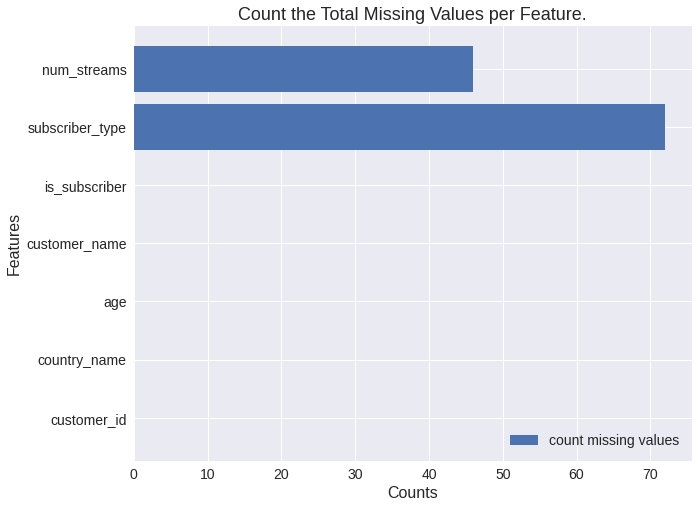

In [8]:
# plot the count of all missing values per feature in the data set (horizontal bar chart)

features = [f for f in data]
counts = [c for c in data.isnull().sum(axis=0)]

plt.barh(features, counts, label='count missing values')
plt.title('Count the Total Missing Values per Feature.')
plt.xlabel("Counts")
plt.ylabel("Features")
plt.legend(loc="lower right")
plt.show()

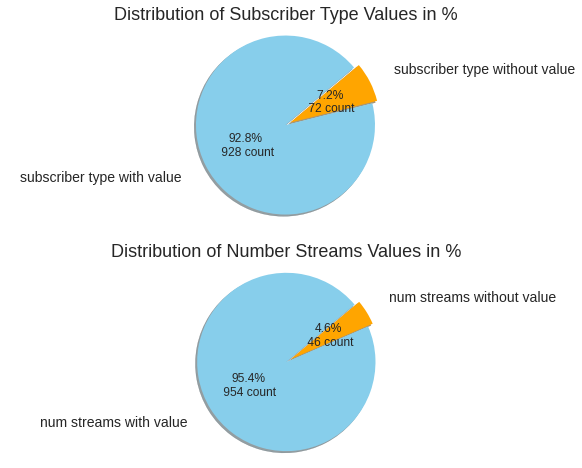

In [9]:
# plot the distributions of the features with missing values (with values / missing values) in % (pie chart)

subscriber_type_val = data['subscriber_type'].notnull().sum()
subscriber_type_nan = data['subscriber_type'].isnull().sum()

num_streams_val = data['num_streams'].notnull().sum()
num_streams_nan = data['num_streams'].isnull().sum()

x1 = [subscriber_type_val, subscriber_type_nan]
autopct1 = lambda p: f'{p:.1f}%\n {(p * sum(x1) / 100):.0f} count'
explode1 = [0.03 for _ in range(len(x1))]
labels1 = [
    'subscriber type with value', 
    'subscriber type without value',
]

x2 = [num_streams_val, num_streams_nan]
autopct2 = lambda p: f'{p:.1f}%\n {(p * sum(x2) / 100):.0f} count'
explode2 = [0.03 for _ in range(len(x2))]
labels2 = [
    'num streams with value', 
    'num streams without value',
]

plt.subplot(2, 1, 1)
plt.pie(
    x=x1, 
    labels=labels1, 
    autopct=autopct1, 
    explode=explode1, 
    shadow=True, startangle=40, 
    labeldistance=1.3, 
    pctdistance=0.5,
    colors=[
        'skyblue',
        'orange',
    ]
)
plt.title('Distribution of Subscriber Type Values in %')
plt.axis('equal')

plt.subplot(2, 1, 2)
plt.pie(
    x=x2, 
    labels=labels2, 
    autopct=autopct2, 
    explode=explode2, 
    shadow=True, 
    startangle=40, 
    labeldistance=1.3, 
    pctdistance=0.5,
    colors=[
        'skyblue',
        'orange',
    ]
)
plt.title('Distribution of Number Streams Values in %')
plt.axis('equal')    

plt.show()